In [1]:
# !pip install tensorflow
# !pip install sklearn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [3]:
data = pd.read_csv('aapl.us.txt', date_parser=True)
data = data.drop(['OpenInt'], axis=1)
data = data[data['Date']>'2008-01-01'].copy()
data.tail()

,Date,Open,High,Low,Close,Volume
8359,2017-11-06,171.75,174.36,171.10,173.63,34901241
8360,2017-11-07,173.29,174.51,173.29,174.18,24424877
8361,2017-11-08,174.03,175.61,173.71,175.61,24451166
8362,2017-11-09,174.48,175.46,172.52,175.25,29533086
8363,2017-11-10,175.11,175.38,174.27,174.67,25130494


In [4]:
trainingData = data[data['Date']<'2015-01-01'].copy()
testingData = data[data['Date']>='2015-01-01'].copy()

In [5]:
trainingData = trainingData.drop(['Date'], axis=1)
testingData = testingData.drop(['Date'], axis=1)

In [6]:
testingData

,Open,High,Low,Close,Volume
7642,105.44,105.49,101.620,103.50,56196458
7643,102.51,102.83,99.790,100.58,67880159
7644,100.97,101.69,99.044,100.59,69460979
7645,101.49,102.42,100.990,102.01,42324520
7646,103.40,106.17,102.880,105.93,62679241
...,...,...,...,...,...
8359,171.75,174.36,171.100,173.63,34901241
8360,173.29,174.51,173.290,174.18,24424877
8361,174.03,175.61,173.710,175.61,24451166
8362,174.48,175.46,172.520,175.25,29533086


In [7]:
scaler = MinMaxScaler()
trainingData = scaler.fit_transform(trainingData)
trainingData

array([[0.14958629, 0.14727732, 0.14394118, 0.14551955, 0.32008318],
       [0.14459262, 0.14369895, 0.14410828, 0.1456462 , 0.24971081],
       [0.13965735, 0.13822443, 0.12675946, 0.12706779, 0.43166317],
       ...,
       [0.94947922, 0.95429794, 0.95950303, 0.9530425 , 0.03100278],
       [0.94801908, 0.94651886, 0.94485728, 0.94008534, 0.03358066],
       [0.94062105, 0.93922598, 0.92716443, 0.92040606, 0.0465214 ]])

In [8]:
Xtrain = []
Ytrain = []

In [9]:
trainingData.shape[0]

1763

In [10]:
for i in range(10, trainingData.shape[0]):
    Xtrain.append(trainingData[i-10:i])
    Ytrain.append(trainingData[i, 0])

In [11]:
Xtrain, Ytrain = np.array(Xtrain), np.array(Ytrain)

In [12]:
Xtrain.shape, Ytrain.shape

((1753, 10, 5), (1753,))

In [13]:
### Building LSTM

In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import tensorflow as tf

In [15]:
regressor = Sequential()

regressor.add(LSTM(units=60, activation='tanh', use_bias=True, return_sequences=True, input_shape=(Xtrain.shape[1], 5)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=80, activation='tanh', use_bias=True, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=100, activation='tanh', use_bias=True, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=120, activation='tanh'))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))


In [16]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 60)            15840     
_________________________________________________________________
dropout (Dropout)            (None, 10, 60)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 80)            45120     
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 80)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 10, 100)           72400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 100)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               1

In [17]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [18]:
regressor.fit(Xtrain, Ytrain, epochs=50, batch_size=32)

Epoch 1/50
55/55 [==============================] - 28s 9ms/step - loss: 0.0203
Epoch 2/50
55/55 [==============================] - 1s 9ms/step - loss: 0.0020
Epoch 3/50
55/55 [==============================] - 1s 9ms/step - loss: 0.0018
Epoch 4/50
55/55 [==============================] - 1s 9ms/step - loss: 0.0016
Epoch 5/50
55/55 [==============================] - 0s 9ms/step - loss: 0.0018
Epoch 6/50
55/55 [==============================] - 1s 9ms/step - loss: 0.0015
Epoch 7/50
55/55 [==============================] - 1s 9ms/step - loss: 0.0015
Epoch 8/50
55/55 [==============================] - 1s 9ms/step - loss: 0.0016
Epoch 9/50
55/55 [==============================] - 1s 9ms/step - loss: 0.0012
Epoch 10/50
55/55 [==============================] - 1s 9ms/step - loss: 0.0013
Epoch 11/50
55/55 [==============================] - 1s 9ms/step - loss: 0.0015
Epoch 12/50
55/55 [==============================] - 0s 9ms/step - loss: 0.0013
Epoch 13/50
55/55 [=============================

In [19]:
### Prepare Test Dataset

In [20]:
dataTrain = data[data['Date']<'2015-01-01'].copy()
dataTest = data[data['Date']>='2015-01-01'].copy()

In [21]:
past60Days = dataTrain.tail(10)

In [22]:
df = past60Days.append(dataTest, ignore_index=True)
df = df.drop(['Date'], axis=1)
df

,Open,High,Low,Close,Volume
0,101.42,103.98,101.12,103.58,56384329
1,105.91,106.64,104.74,106.64,62279357
2,106.27,107.18,105.71,105.82,93393464
3,106.18,107.43,106.01,106.92,47699142
4,107.17,107.27,106.45,106.53,27476050
...,...,...,...,...,...
727,171.75,174.36,171.10,173.63,34901241
728,173.29,174.51,173.29,174.18,24424877
729,174.03,175.61,173.71,175.61,24451166
730,174.48,175.46,172.52,175.25,29533086


In [23]:
inputs = scaler.transform(df)
inputs

array([[0.88815341, 0.90898483, 0.89551388, 0.91154063, 0.06000278],
       [0.93186022, 0.93485025, 0.93109617, 0.94135183, 0.06627612],
       [0.93536455, 0.94010113, 0.94063065, 0.93336321, 0.09938697],
       ...,
       [1.59495766, 1.6055037 , 1.60902729, 1.6132728 , 0.02602031],
       [1.59933807, 1.60404512, 1.59733035, 1.6097656 , 0.03142836],
       [1.60547065, 1.60326721, 1.61453173, 1.60411511, 0.02674324]])

In [24]:
Xtest = []
Ytest = []

for i in range(10, inputs.shape[0]):
    Xtest.append(inputs[i-10:i])
    Ytest.append(inputs[i, 0])

In [25]:
Xtest, Ytest = np.array(Xtest), np.array(Ytest)
Xtest.shape, Ytest.shape 

((722, 10, 5), (722,))

In [26]:
Ypred = regressor.predict(Xtest)

In [27]:
s = scaler.scale_
scale = 1 / s[0]

In [28]:
scale

102.72999999999999

In [29]:
Ypred = Ypred*scale
Ytest = Ytest*scale
Ypred.shape

(722, 1)

In [30]:
### Visualization

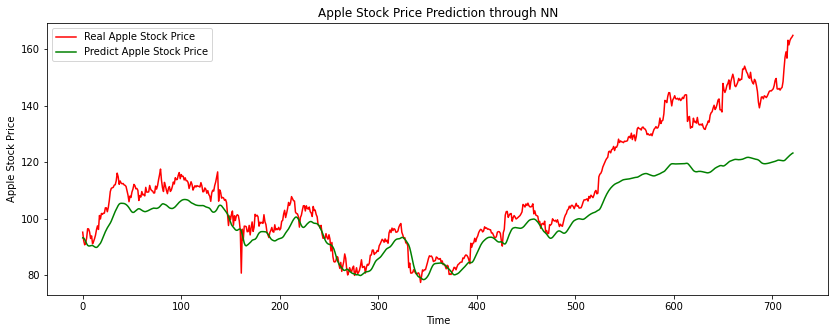

In [31]:
plt.figure(figsize=(14,5))
plt.plot(Ytest, color='red', label='Real Apple Stock Price')
plt.plot(Ypred, color='green', label='Predict Apple Stock Price')
plt.title('Apple Stock Price Prediction through NN')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()